<a href="https://colab.research.google.com/github/Ajaypuppala02/BIG-DATA-ANALYTICS/blob/main/Crimes_against_women_in_india.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing required libraries

In [ ]:
pip install Pyspark

 Initialize Spark session




In [ ]:
from pyspark.sql import SparkSession

Load dataset into Spark DataFrame

In [ ]:
crime = SparkSession.builder.appName('/content/crimes_against_women_2001-2014.csv').getOrCreate()

In [ ]:
print (crime.version)

3.5.4


In [ ]:
crime.stop

<bound method SparkSession.stop of <pyspark.sql.session.SparkSession object at 0x7d6b8bd3edd0>>

In [ ]:
from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder.appName("Crimes against women in india").getOrCreate()

In [ ]:
data_path = "/content/crimes_against_women_2001-2014.csv"

In [ ]:
AB = spark.read.csv(data_path ,  header=True , inferSchema=True)

Display basic dataset information

In [ ]:
AB.printSchema

<bound method DataFrame.printSchema of DataFrame[_c0: int, STATE/UT: string, DISTRICT: string, Year: int, Rape: int, Kidnapping and Abduction: int, Dowry Deaths: int, Assault on women with intent to outrage her modesty: int, Insult to modesty of Women: int, Cruelty by Husband or his Relatives: int, Importation of Girls: int]>

In [ ]:
print ("Number of rows:", AB.count())

Number of rows: 10677


Preview the first few rows

In [ ]:
AB.show(5)

+---+--------------+-------------+----+----+------------------------+------------+---------------------------------------------------+--------------------------+-----------------------------------+--------------------+
|_c0|      STATE/UT|     DISTRICT|Year|Rape|Kidnapping and Abduction|Dowry Deaths|Assault on women with intent to outrage her modesty|Insult to modesty of Women|Cruelty by Husband or his Relatives|Importation of Girls|
+---+--------------+-------------+----+----+------------------------+------------+---------------------------------------------------+--------------------------+-----------------------------------+--------------------+
|  0|ANDHRA PRADESH|     ADILABAD|2001|  50|                      30|          16|                                                149|                        34|                                175|                   0|
|  1|ANDHRA PRADESH|    ANANTAPUR|2001|  23|                      30|           7|                                          

 Check for missing values

In [ ]:
from pyspark.sql.functions import isnull , when , count

In [ ]:
missing_values = AB.select([count(when(isnull(c), c)).alias(c) for c in AB.columns])

In [ ]:
missing_values. show()

+---+--------+--------+----+----+------------------------+------------+---------------------------------------------------+--------------------------+-----------------------------------+--------------------+
|_c0|STATE/UT|DISTRICT|Year|Rape|Kidnapping and Abduction|Dowry Deaths|Assault on women with intent to outrage her modesty|Insult to modesty of Women|Cruelty by Husband or his Relatives|Importation of Girls|
+---+--------+--------+----+----+------------------------+------------+---------------------------------------------------+--------------------------+-----------------------------------+--------------------+
|  0|       0|       0|   0|   0|                       0|           0|                                                  0|                         0|                                  0|                   0|
+---+--------+--------+----+----+------------------------+------------+---------------------------------------------------+--------------------------+------------------

In [ ]:
AB = AB.dropna()

In [ ]:
print('Total rows after dropping missing values:', AB.count())

Total rows after dropping missing values: 10677


Crime trend analysis over the years

In [ ]:
crime_trend = AB.groupBy("year").agg(count("DISTRICT").alias("Total_Crimes")).orderBy("year")

In [ ]:
crime_trend.show()

+----+------------+
|year|Total_Crimes|
+----+------------+
|2001|         716|
|2002|         719|
|2003|         728|
|2004|         729|
|2005|         733|
|2006|         740|
|2007|         743|
|2008|         761|
|2009|         767|
|2010|         779|
|2011|         791|
|2012|         811|
|2013|         823|
|2014|         837|
+----+------------+



NameError: name 'STATE' is not defined

Identify top 5 states with the highest reported crimes

In [ ]:
from pyspark.sql.functions import col

In [ ]:
from re import A
from pyspark.sql.functions import col, count, desc

Top_states = AB.groupBy("STATE/UT").agg(count(col("DISTRICT")).alias("Total_Crimes")).orderBy(desc("Total_Crimes"))

In [ ]:
Top_states.show(5)

+--------------+------------+
|      STATE/UT|Total_Crimes|
+--------------+------------+
| UTTAR PRADESH|         878|
|MADHYA PRADESH|         628|
|   MAHARASHTRA|         552|
|         BIHAR|         540|
|    TAMIL NADU|         469|
+--------------+------------+
only showing top 5 rows



Analyze crime distribution by category

In [ ]:
Crime_category = AB.groupBy("RAPE").agg(count("DISTRICT").alias("Total_Crimes")).orderBy(desc("Total_Crimes"))

In [ ]:
Crime_category.show(10)

+----+------------+
|RAPE|Total_Crimes|
+----+------------+
|   0|         593|
|   1|         395|
|   2|         296|
|   3|         249|
|  12|         242|
|   6|         241|
|  10|         241|
|   5|         237|
|   7|         234|
|   8|         225|
+----+------------+
only showing top 10 rows



In [ ]:
Crime_category = AB.groupBy("DOWRY DEATHS").agg(count("DISTRICT").alias("Total_Crimes")).orderBy(desc("Total_Crimes"))

In [ ]:
Crime_category.show(10)

+------------+------------+
|DOWRY DEATHS|Total_Crimes|
+------------+------------+
|           0|        2647|
|           1|         739|
|           2|         574|
|           3|         550|
|           4|         489|
|           5|         445|
|           6|         359|
|           7|         338|
|           8|         284|
|          10|         260|
+------------+------------+
only showing top 10 rows



In [ ]:
Crime_category = AB.groupBy("Kidnapping and Abduction").agg(count("DISTRICT").alias("Total_Crimes")).orderBy(desc("Total_Crimes"))

In [ ]:
Crime_category.show(10)

+------------------------+------------+
|Kidnapping and Abduction|Total_Crimes|
+------------------------+------------+
|                       0|         951|
|                       1|         384|
|                       2|         304|
|                       5|         286|
|                       4|         284|
|                       3|         266|
|                       6|         255|
|                      10|         249|
|                       7|         247|
|                       8|         245|
+------------------------+------------+
only showing top 10 rows



In [ ]:
Crime_category = AB.groupBy("Assault on women with intent to outrage her modesty").agg(count("DISTRICT").alias("Total_Crimes")).orderBy(desc("Total_Crimes"))

In [ ]:
Crime_category.show(10)

+---------------------------------------------------+------------+
|Assault on women with intent to outrage her modesty|Total_Crimes|
+---------------------------------------------------+------------+
|                                                  0|         685|
|                                                  2|         264|
|                                                  1|         255|
|                                                  5|         232|
|                                                  3|         217|
|                                                  4|         209|
|                                                  6|         197|
|                                                  8|         181|
|                                                  7|         180|
|                                                 11|         178|
+---------------------------------------------------+------------+
only showing top 10 rows



In [ ]:
Crime_category = AB.groupBy("Insult to modesty of Women").agg(count("DISTRICT").alias("Total_Crimes")).orderBy(desc("Total_Crimes"))

In [ ]:
Crime_category.show(10)

+--------------------------+------------+
|Insult to modesty of Women|Total_Crimes|
+--------------------------+------------+
|                         0|        4534|
|                         1|         728|
|                         2|         531|
|                         3|         385|
|                         4|         329|
|                         5|         284|
|                         7|         225|
|                         6|         222|
|                         8|         177|
|                         9|         165|
+--------------------------+------------+
only showing top 10 rows



In [ ]:
Crime_category = AB.groupBy("Cruelty by Husband or his Relatives").agg(count("DISTRICT").alias("Total_Crimes")).orderBy(desc("Total_Crimes"))

In [ ]:
Crime_category.show(10)

+--------------------------+------------+
|Insult to modesty of Women|Total_Crimes|
+--------------------------+------------+
|                         0|        4534|
|                         1|         728|
|                         2|         531|
|                         3|         385|
|                         4|         329|
|                         5|         284|
|                         7|         225|
|                         6|         222|
|                         8|         177|
|                         9|         165|
+--------------------------+------------+
only showing top 10 rows



In [ ]:
Crime_category = AB.groupBy("Importation of Girls").agg(count("DISTRICT").alias("Total_Crimes")).orderBy(desc("Total_Crimes"))

In [ ]:
Crime_category.show(10)

+--------------------+------------+
|Importation of Girls|Total_Crimes|
+--------------------+------------+
|                   0|       10399|
|                   1|         106|
|                   2|          47|
|                   3|          24|
|                   5|          18|
|                   4|          16|
|                   9|           7|
|                  12|           7|
|                   8|           7|
|                   6|           6|
+--------------------+------------+
only showing top 10 rows



 creatae crime trend and Convert crime trend to Pandas for visualization

In [8]:
# Make sure the SparkSession is initialized
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Crimes against women in india").getOrCreate()

# Define the path to your data
data_path = "/content/crimes_against_women_2001-2014.csv"

# Load the data into the AB DataFrame
AB = spark.read.csv(data_path, header=True, inferSchema=True)

# Now you can use AB to perform operations
crime_trend = AB.groupBy("year").agg(count("DISTRICT").alias("Total_crimes")).orderBy("year")

NameError: name 'count' is not defined

creatae crime trend and Convert crime trend to Pandas for visualization

In [11]:
# Make sure the SparkSession is initialized
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Crimes against women in india").getOrCreate()

# Define the path to your data
data_path = "/content/crimes_against_women_2001-2014.csv"

# Load the data into the AB DataFrame
AB = spark.read.csv(data_path, header=True, inferSchema=True)

# Now you can use AB to perform operations
crime_trend = AB.groupBy("year").agg(count("DISTRICT").alias("Total_crimes")).orderBy("year")

NameError: name 'count' is not defined

In [13]:
# Make sure the SparkSession is initialized
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Crimes against women in india").getOrCreate()

# Define the path to your data
data_path = "/content/crimes_against_women_2001-2014.csv"

# Load the data into the AB DataFrame
AB = spark.read.csv(data_path, header=True, inferSchema=True)

# Now you can use AB to perform operations
from pyspark.sql.functions import count # Import the count function


CREATE AND CONVERT CRIME TRENDS TO PANDAS FOR VISUALIZATION

In [14]:
crime_trend = AB.groupBy("year").agg(count("DISTRICT").alias("Total_crimes")).orderBy("year")

In [15]:
crime_trend.pd = crime_trend.toPandas()

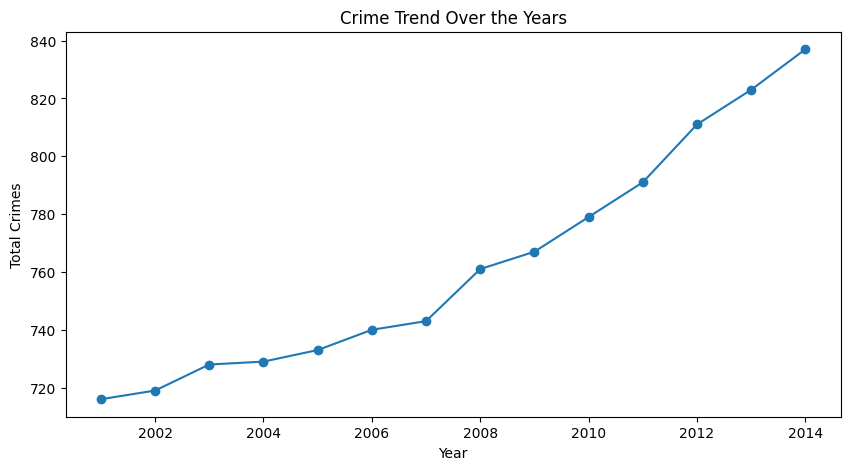

In [22]:
import matplotlib.pyplot as plt

# ... (your previous code) ...

# Convert crime trend to Pandas for visualization
crime_trend_pd = crime_trend.toPandas()

# Plot the data using the correct column name "year"
plt.figure(figsize=(10, 5))
plt.plot(crime_trend_pd["year"], crime_trend_pd["Total_crimes"], marker='o', linestyle='-')
plt.xlabel("Year")  # Add label for x-axis
plt.ylabel("Total Crimes")  # Add label for y-axis
plt.title("Crime Trend Over the Years")  # Add a title to the plot
plt.show()  # Display the plot

Save analysis results

In [23]:
crime_trend.write.csv("/mnt/data/crime_trend_analysis", mode="overwrite")

In [26]:
# Assuming the required imports and SparkSession are already set up

# Define the path to your data
data_path = "/content/crimes_against_women_2001-2014.csv"

# Load the data into the AB DataFrame
AB = spark.read.csv(data_path, header=True, inferSchema=True)

# Calculate Top_states
from pyspark.sql.functions import col, count, desc
Top_states = AB.groupBy("STATE/UT").agg(count(col("DISTRICT")).alias("Total_Crimes")).orderBy(desc("Total_Crimes"))


In [27]:
# Now you can save it
Top_states.write.csv("/mnt/data/top_states_analysis", mode="overwrite")

SAVING THE BIG DATA ANALYSIS

In [28]:
print("Big Data analysis using PySpark completed successfully!")

Big Data analysis using PySpark completed successfully!
